In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set Standard Deviations cut-off

In [64]:
# SD Outlier cutoff:
#   - 2.50 produces ~ 99/01 split
#   - 1.25 produces ~ 80/20 split
#   - 1.52 produces ~ 90/10 split

olsd = 1.52

Load Main Dataset (with dirty date labels)

In [65]:
df = pd.read_csv('decades-MusicBrainz.csv')
df.sample()

,Title,Artist,Genres,Lyric,Decade,Year,Popularity
36310,Slow Down,The Supremes,Soul Music; Pop,"Don't run so fast, love\nSlow down and let me ...",1970,1976,0.3


How many songs do most artists have in the dataset?

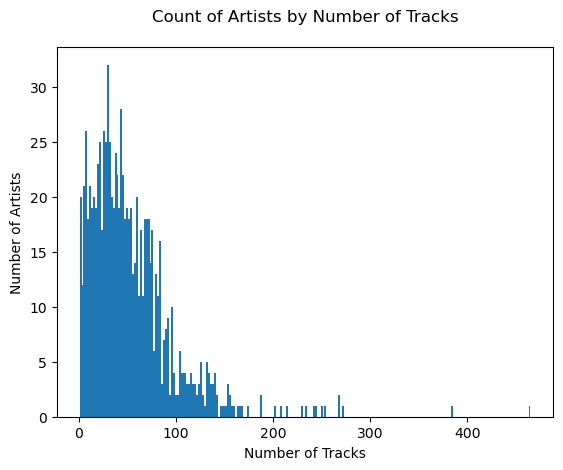

In [66]:
tracks = df.groupby('Artist')['Title'].count().reset_index() \

tracks.plot(
    kind='hist', bins=(tracks['Title'].max() - tracks['Title'].min()) // 2, 
    title = 'Count of Artists by Number of Tracks\n', legend=False
)
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Artists')
plt.show()

Caculate means and standard deviations

In [67]:
meansd = df.groupby('Artist', as_index=False)['Year'].agg({'mean_year': 'mean', 'std_year': 'std'})
meansd['low_year'] = meansd['mean_year'] - (meansd['std_year'] * olsd)
meansd['high_year'] = meansd['mean_year'] + (meansd['std_year'] * olsd)
meansd.sample(2)

,Artist,mean_year,std_year,low_year,high_year
357,Hinder,1992.925926,20.350630,1961.992968,2023.858884
749,Snoop Dogg,1993.028571,16.238308,1968.346344,2017.710799


Integrate means/sdevs into the original dataframe

In [68]:
stats = df.merge(meansd, how='left', on='Artist')
stats['Outlier'] = stats.apply(lambda x: x['Year']<x['low_year'] or x['Year'] > x['high_year'], axis=1)

# Create dataframe containing only outliers
train = stats[~stats['Outlier']]
test = stats[stats['Outlier']]

In [69]:
print(f'Total Rows: {len(df)}')
print(f'Outliers: {len(test)}')
print(f'Training Set: {len(df)-len(test)} ({1-len(test)/len(df):.2%})')

Total Rows: 50058
Outliers: 4845
Training Set: 45213 (90.32%)


Plot cut-offs

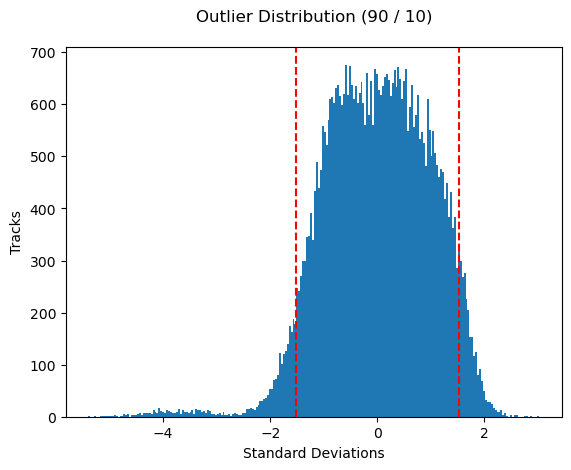

In [70]:
olpct = (len(test)/len(df)) * 100
                                
devdf = stats.loc[:, ['Year','mean_year','std_year']]
devdf['devs'] = (devdf['Year'] - devdf['mean_year']) / devdf['std_year']

devdf['devs'].plot(
    kind='hist', bins=(tracks['Title'].max() - tracks['Title'].min()) // 2, 
    title = f'Outlier Distribution ({100-olpct:.0f} / {olpct:.0f})\n', legend=False
)
plt.axvline(x=-olsd, color='red', linestyle = '--')
plt.axvline(x=olsd, color='red', linestyle = '--')
plt.xlabel('Standard Deviations')
plt.ylabel('Tracks')
plt.show()

View the test (outliers) dataset

In [71]:
test.sample(20)

,Title,Artist,Genres,Lyric,Decade,Year,Popularity,mean_year,std_year,low_year,high_year,Outlier
27624,Tiptoe,Imagine Dragons,Rock; Rock Alternativo; Indie,In the morning light\nLet my roots take flight...,2010,2016,67.5,1984.458333,20.330903,1953.555361,2015.361306,True
23417,The Culling,Iced Earth,Heavy Metal; Rock; Hard Rock,Send them down to the pits of hell\nclip the a...,2010,2017,0.0,1989.782609,17.480972,1963.211531,2016.353687,True
20478,Cry Baby,Cheap Trick,Power-Pop; Rock; Hard Rock,Cry!\nCry baby\nooooh ooooh\nCry baby\n\n\n\nP...,1950,1955,0.0,1987.528846,15.551329,1963.890827,2011.166866,True
33749,Coming Back for You,Maroon 5,Pop; Rock; Pop/Rock,Looking at the same sky that we used to live u...,2010,2018,64.0,1987.565217,20.000167,1957.164963,2017.965472,True
18179,This House Is Not For Sale,Bon Jovi,Hard Rock; Rock; Pop/Rock,These four walls have got a story to tell\nOh-...,2010,2018,45.9,1987.840580,18.710329,1959.400880,2016.280279,True
42059,Fatal Distraction,Mario,R&B,"Tossing and turning\nI can't better be alone, ...",2020,2020,1.1,1986.937500,21.528216,1954.214611,2019.660389,True
13853,Mr. Soul,Iron & Wine,Folk; Indie; Romântico,"Well hello Mr. Soul, I dropped by to pick up a...",1960,1962,0.0,1992.966667,19.473206,1963.367394,2022.565940,True
9988,No One's Home,Cyndi Lauper,Pop/Rock; Pop; Dance,Leave me alone\nI'm not home\nDon't hear your ...,2010,2017,24.0,1986.896825,17.592193,1960.156691,2013.636959,True
41489,Once Upon a Time,R. Kelly,R&B; Hip Hop,There was a family filled with cheer and lots ...,1900,1906,3.1,1987.215827,22.504673,1953.008724,2021.422931,True
28890,Lightnin',Sonic Youth,Rock; Indie,(Kim)\n\nlightnin'\nlightnin' strike\nlightnin...,1960,1960,0.0,1991.505882,15.745463,1967.572778,2015.438986,True
